In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.bandstructure import BandStructure
from pymatgen.electronic_structure.plotter import BSPlotter
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with MPRester("D0ZXquWb8kOQRgLT") as m:
    # Structure for material id
    bandstructure = m.get_bandstructure_by_material_id("mp-1008559")

# Structure de bande du BP 

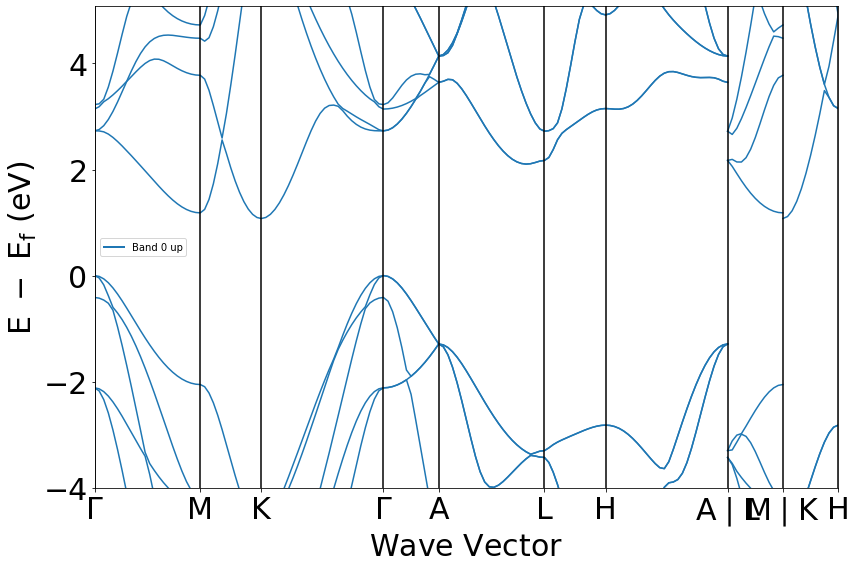

In [3]:
BandStruct = BSPlotter(bandstructure)
BandStruct.show()

# 1) Détermination de la bande interdite

In [4]:
# Analyse de la bande interdite
BandGap = bandstructure.get_band_gap()
print("Analyse de la bande interdite")
print(BandGap)
print("On a une bande interdite indirecte")
print("L'énergie de cette bande est de 1.0759 eV")
print("Et la direction de la transition est Gamma-K")

Analyse de la bande interdite
{'direct': False, 'energy': 1.0758999999999999, 'transition': '\\Gamma-K'}
On a une bande interdite indirecte
L'énergie de cette bande est de 1.0759 eV
Et la direction de la transition est Gamma-K


# 2) Dispersion maximale et minimale de bandes électroniques

In [5]:
bd = BandStruct.bs_plot_data()  # Data de ma structure de bande
x = bd.get('ticks').get('distance')  # Distances des énergies
y = bd.get('energy')  # Valeurs des énergies

LastValenceBand = bandstructure.get_vbm()  # Dernière bande de valence
FirstConductionBand = bandstructure.get_cbm()  # Première bande de conduction
print(LastValenceBand.get('band_index'))
print("La dernière bande de valence se situe à la 7ème position dans la liste des bandes.")
print(FirstConductionBand.get('band_index'))
print("La première bande de conduction se situe à la 8ème position dans la liste des bandes.")

# Certaines distances dans 'x' sont égales, je vais donc les enlever
Dist = [] 
i = 0
while i < len(x) :
    if x[i] == x[i-1] :
        i = i + 2
        Dist.append(x[i-1])
    else :
        Dist.append(x[i])
        i = i + 1
        
#Calcul des pentes de la bande de conduction et de valence
penteValence = np.zeros(len(Dist)-1)
penteConduction =  np.zeros(len(Dist)-1)
dDist = np.zeros(len(Dist)-1)

for j in range(0,len(Dist)-1):
    dDist[j] = Dist[j+1]-Dist[j]
    penteValence[j] = abs((y.get('1')[j][7][-1] - y.get('1')[j][7][0])/dDist[j])
    penteConduction[j] = abs((y.get('1')[j][8][-1] - y.get('1')[j][8][0])/(dDist[j]))

#Calcul des pentes maximales et minimales de la bande de conduction et de valence
maxValence = np.max(penteValence)
minValence = np.min(penteValence)
maxConduction = np.max(penteConduction)
minConduction = np.min(penteConduction)
print("Le max de dispesion pour la dernière bande de valence vaut :",maxValence)
print("Le min de dispesion pour la dernière bande de valence vaut :",minValence)
print("Le max de dispesion pour la première bande de conduction vaut :",maxConduction)
print("Le min de dispesion pour la première bande de conduction vaut :",minConduction)

defaultdict(<class 'list'>, {<Spin.up: 1>: [6, 7]})
La dernière bande de valence se situe à la 7ème position dans la liste des bandes.
defaultdict(<class 'list'>, {<Spin.up: 1>: [8]})
La première bande de conduction se situe à la 8ème position dans la liste des bandes.
Le max de dispesion pour la dernière bande de valence vaut : 4.128256774346468
Le min de dispesion pour la dernière bande de valence vaut : 0.7339089198351448
Le max de dispesion pour la première bande de conduction vaut : 3.4974983342110386
Le min de dispesion pour la première bande de conduction vaut : 0.16319273920131844


La flèche rouge représente le max de dispersion de la bande de valence. Cela correspond à une dispersion max dans la direction M - K
La flèche noire représente le min de dispersion de la bande de valence. Cela correspond à une dispersion min dans la direction L - H
La flèche bleue représente le max de dispersion de la bande de conduction. Cela correspond à une dispersion max dans la direction K - H
La flèche verte représente le min de dispersion de la bande de conduction. Cela correspond à une dispersion min dans la direction M - K

Structure des bandes avec min et max de dispersion


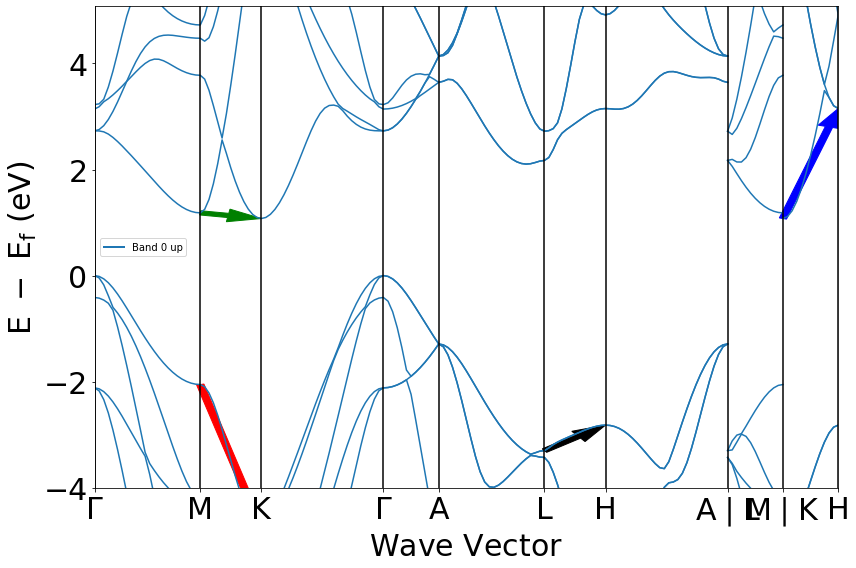

In [6]:
# Plot du graphe
Graph = BandStruct.get_plot()

# Fleche pour max de dispersion de la bande de valence
plt.arrow(Dist[1],y.get('1')[1][7][0],dDist[1],y.get('1')[1][7][-1]-y.get('1')[1][7][0],color='r',width=0.08,length_includes_head=True)
# Fleche pour min de dispersion de la bande de valence
plt.arrow(Dist[5],y.get('1')[5][7][0],dDist[5],y.get('1')[5][7][-1]-y.get('1')[5][7][0],color='k',width=0.08,length_includes_head=True)
# Fleche pour max de dispersion de la bande de conduction
plt.arrow(Dist[8],y.get('1')[8][8][0],dDist[8],y.get('1')[8][8][-1]-y.get('1')[8][8][0],color='b',width=0.08,length_includes_head=True)
# Fleche pour min de dispersion de la bande de conduction
plt.arrow(Dist[1],y.get('1')[1][8][0],dDist[1],y.get('1')[1][8][-1]-y.get('1')[1][8][0],color='g',width=0.08,length_includes_head=True)


print("La flèche rouge représente le max de dispersion de la bande de valence. Cela correspond à une dispersion max dans la direction M - K")
print("La flèche noire représente le min de dispersion de la bande de valence. Cela correspond à une dispersion min dans la direction L - H")
print("La flèche bleue représente le max de dispersion de la bande de conduction. Cela correspond à une dispersion max dans la direction K - H")
print("La flèche verte représente le min de dispersion de la bande de conduction. Cela correspond à une dispersion min dans la direction M - K\n")

print("Structure des bandes avec min et max de dispersion")

# 3) Calcul des masses effectives

On peut calculer la masse effective grâce à cette formule, il va donc falloir déterminer la dérivée seconde de l'énergie sous une dispersion parabolique.


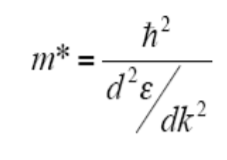

In [20]:
from IPython.display import Image
print("On peut calculer la masse effective grâce à cette formule, il va donc falloir déterminer la dérivée seconde de l'énergie sous une dispersion parabolique.")
Image(filename = "MasseEff.png", width = 100, height = 50)


In [39]:
# Calcul de la masse effective pour le sommet de la dernière bande de valence
# Initialisation de constantes
hBarre = 1.054571818*(10**(-34))
eV = 1.602176563*(10**(-19))
Angstrom = 10**(-10)
print("On a besoin de diviser notre réponse par un eV multiplié par le carré d'un Angstrom pour avoir la réponse en Kg")

# Résolution de l'équation de la parabole
print("Max de la dernière bande de valence : (",Dist[0],",",y.get('1')[0][7][0],")")
print("Equation Parabole = ax² + bx + c") 
print("Sommet de la parabole : (0.0 , 0.0). Donc c = 0.0")
coord = bd.get('distances')

a_V = [[(coord[0][1])**2,coord[0][1]],[coord[0][10]**2,coord[0][10]]] # Coefficient a de la parabole
b_V = [y.get('1')[1][7][0],y.get('1')[0][7][10]] # Coefficient b de la parabole
soluce_V = np.linalg.solve(a_V,b_V)

d2e_V = 2*soluce_V[0]*(Angstrom**2)*eV  # Dérivée seconde de l'énergie
masseEffValence = (hBarre**2)/d2e_V  # Calcul de la masse effective
print("Masse effective de la dernière bande de valence vaut :",masseEffValence,"Kg")

On a besoin de diviser notre réponse par un eV multiplié par le carré d'un Angstrom pour avoir la réponse en Kg
Max de la dernière bande de valence : ( 0.0 , 0.0 )
Equation Parabole = ax² + bx + c
Sommet de la parabole : (0.0 , 0.0). Donc c = 0.0
Masse effective de la dernière bande de valence vaut : 3.8894294429093835e-32 Kg


In [43]:
# Calcul de la masse effective pour la base de la première bande de conduction
print("On a deux minimums pour la première bande de conduction")
print("Le premier minimun : (",Dist[2],",",y.get('1')[2][8][0],")")
print("Le deuxième minimum : (",Dist[8],",",y.get('1')[8][8][0],")")

# Masse Effective du premier minimum
a_C1 = [[coord[1][10]**2,coord[1][10],1.0],[coord[2][0]**2,coord[2][0],1.0],[coord[2][10]**2,coord[2][10],1.0]] # Coefficient a de la parabole
b_C1 = [y.get('1')[1][8][10],y.get('1')[2][8][0],y.get('1')[2][8][10]] # Coefficient b de la parabole
soluce_C1 = np.linalg.solve(a_C1,b_C1)

d2e_C1 = 2*soluce_C1[0]*(Angstrom**2)*eV  # Dérivée seconde de l'énergie
masseEffConduction1 = (hBarre**2)/d2e_C1  # Calcul de la masse effective
print("Masse effective de la dernière bande de valence pour le premier minimum vaut :",masseEffConduction1,"Kg")

# Masse Effective du second minimum
a_C2 = [[coord[7][10]**2,coord[7][10],1.0],[coord[8][0]**2,coord[8][0],1.0],[coord[8][10]**2,coord[8][10],1.0]] # Coefficient a de la parabole
b_C2 = [y.get('1')[7][8][10],y.get('1')[8][8][0],y.get('1')[8][8][10]] # Coefficient b de la parabole
soluce_C2 = np.linalg.solve(a_C2,b_C2)

d2e_C2 = 2*soluce_C2[0]*(Angstrom**2)*eV  # Dérivée seconde de l'énergie
masseEffConduction2 = (hBarre**2)/d2e_C2  # Calcul de la masse effective
print("Masse effective de la dernière bande de valence pour le deuxième minimum vaut :",masseEffConduction2,"Kg")

On a deux minimums pour la première bande de conduction
Le premier minimun : ( 1.7879656439613951 , 1.0758999999999999 )
Le deuxième minimum : ( 7.379627823341365 , 1.0758999999999999 )
Masse effective de la dernière bande de valence pour le premier minimum vaut : 4.966198356877529e-31 Kg
Masse effective de la dernière bande de valence pour le deuxième minimum vaut : 3.424123885075922e-31 Kg
